In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# **Data Cleaning**

In [26]:
df1 = pd.read_csv("San_Diego_Raw_Data.csv")
df1.head()

,Unnamed: 0,Full_address,Area,Apartment_Name,sqft,Beds,Baths,Price
0,0,"550 W Date St, San Diego, CA 92101",Little Italy,Capri 1,551.0,0,1.0,3095
1,1,"550 W Date St, San Diego, CA 92101",Little Italy,Capri 3,588.0,0,1.0,3350
2,2,"550 W Date St, San Diego, CA 92101",Little Italy,Capri 5,670.0,0,1.0,3770
3,3,"550 W Date St, San Diego, CA 92101",Little Italy,Capri L3,754.0,0,1.0,4115
4,4,"550 W Date St, San Diego, CA 92101",Little Italy,Firenze 2,835.0,1,1.0,3955


In [27]:
df1.shape

(1484, 8)

In [28]:
# Drop Columns
df2 = df1.drop(["Unnamed: 0", "Full_address", "Apartment_Name"], axis="columns")
df2.head()

,Area,sqft,Beds,Baths,Price
0,Little Italy,551.0,0,1.0,3095
1,Little Italy,588.0,0,1.0,3350
2,Little Italy,670.0,0,1.0,3770
3,Little Italy,754.0,0,1.0,4115
4,Little Italy,835.0,1,1.0,3955


In [29]:
# Check nan values
df2.isna().sum()

Area      0
sqft     53
Beds      0
Baths     0
Price     0
dtype: int64

In [30]:
# fill sqft with mean()
df3 = df2.fillna(df2["sqft"].mean())
# Check nan values
df3.isna().sum()

Area     0
sqft     0
Beds     0
Baths    0
Price    0
dtype: int64

<Axes: xlabel='Area'>

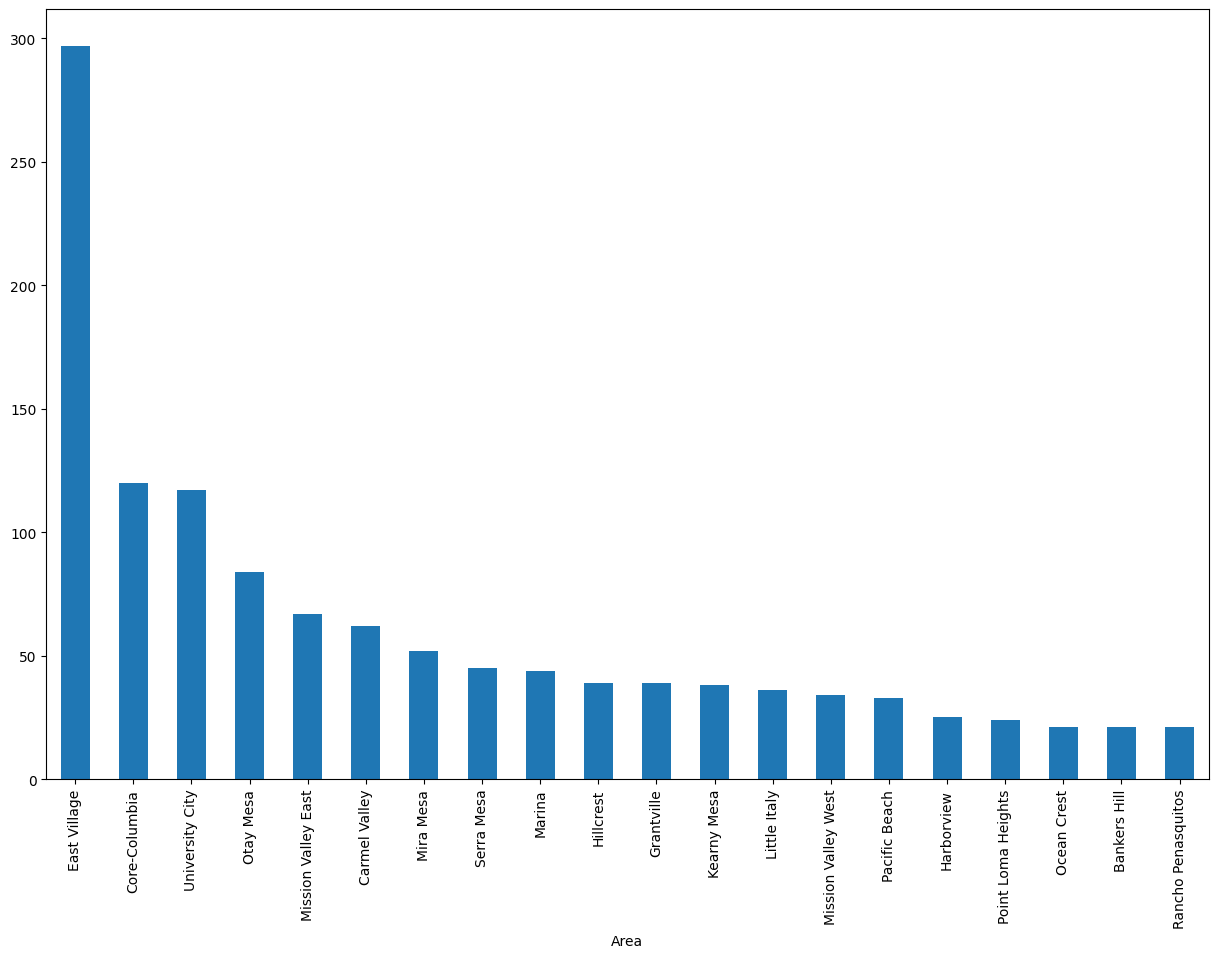

In [31]:
#Clean Area Name
df3["Area"] = df3["Area"].apply(lambda x: x.strip())
len(df3["Area"].unique())

df3.groupby('Area')['Area'].agg('count').sort_values(ascending=False)[:20].plot.bar()

In [32]:
# Check number of Apartments by Area
less_df = df3.groupby('Area')['Area'].agg('count').sort_values(ascending=False)

len(df3["Area"].unique())

75

In [33]:
# Add new areas merging areas with less than ten apartments
df3.head()
df4=df3.copy()
location_less_than_10 = less_df[less_df<=10]
df4["Area"] = df4["Area"].apply(lambda x: "Other" if x in location_less_than_10 else x)
len(df4["Area"].unique())

29

In [34]:
df4.head()

,Area,sqft,Beds,Baths,Price
0,Little Italy,551.0,0,1.0,3095
1,Little Italy,588.0,0,1.0,3350
2,Little Italy,670.0,0,1.0,3770
3,Little Italy,754.0,0,1.0,4115
4,Little Italy,835.0,1,1.0,3955


In [35]:
df4["Beds"].unique()

array([0, 1, 2, 3, 4])

In [36]:
df4["Baths"].unique()

array([1. , 2. , 2.5, 3. , 1.5, 0. , 3.5])

In [37]:
df4.describe()

,sqft,Beds,Baths,Price
count,1484.000000,1484.000000,1484.000000,1484.000000
mean,910.317959,1.433288,1.456536,3386.030323
std,320.752683,0.813074,0.537499,1269.808486
min,100.000000,0.000000,0.000000,590.000000
25%,685.000000,1.000000,1.000000,2615.000000
50%,900.500000,1.000000,1.000000,3170.000000
75%,1095.250000,2.000000,2.000000,3765.750000
max,2782.000000,4.000000,3.500000,13025.000000


**Create price per sqft for outlier detection**

In [38]:
# Create a new feature that can be useful for outlier detection and removal in later stages
df5 = df4.copy()

In [39]:
df5["price_per_sqft"] = df5["Price"]/df5["sqft"]
df5.head()

,Area,sqft,Beds,Baths,Price,price_per_sqft
0,Little Italy,551.0,0,1.0,3095,5.617060
1,Little Italy,588.0,0,1.0,3350,5.697279
2,Little Italy,670.0,0,1.0,3770,5.626866
3,Little Italy,754.0,0,1.0,4115,5.457560
4,Little Italy,835.0,1,1.0,3955,4.736527


In [40]:
df5.shape

(1484, 6)

In [41]:
# Filter points beyond standard deviation
def remove_pps_outlier(df):
  df_out = pd.DataFrame()
  subdf =df.copy()
  m = np.mean(subdf["price_per_sqft"])
  st = np.std(subdf["price_per_sqft"])
  reduce_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
  df_out = pd.concat([df_out,reduce_df], ignore_index=True)
  return df_out
df6=remove_pps_outlier(df5)
df6.shape

(1088, 6)

[]

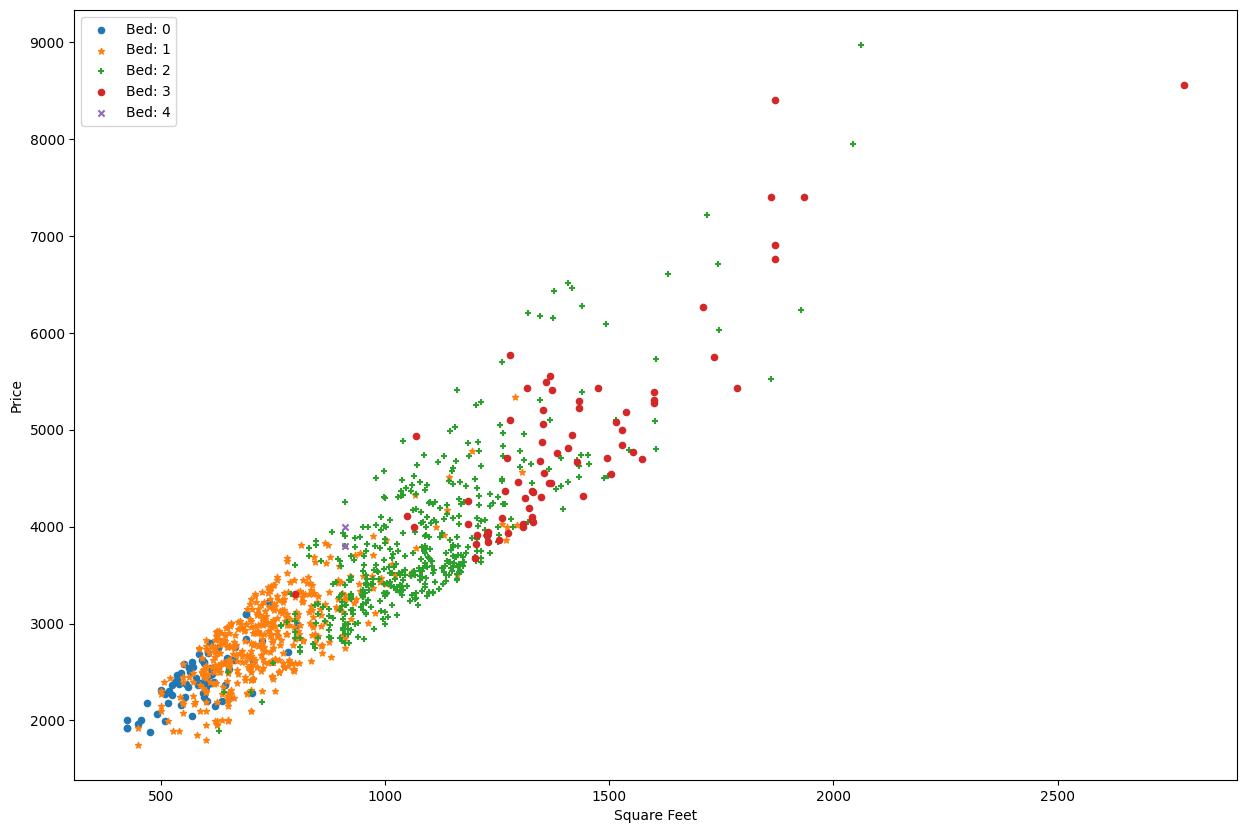

In [42]:
bed_0 = df6[(df6.Beds==0)]
bed_1 = df6[(df6.Beds==1)]
bed_2 = df6[(df6.Beds==2)]
bed_3 = df6[(df6.Beds==3)]
bed_4 = df6[(df6.Beds==4)]
markersize=20
plt.rcParams['figure.figsize'] = (15, 10)
plt.scatter(bed_0.sqft,bed_0.Price,color="tab:blue", label="Bed: 0", s=markersize)
plt.scatter(bed_1.sqft,bed_1.Price,color="tab:orange", label="Bed: 1", marker="*", s=markersize)
plt.scatter(bed_2.sqft,bed_2.Price,color="tab:green", label="Bed: 2",marker="+", s=markersize)
plt.scatter(bed_3.sqft,bed_3.Price,color="tab:red", label="Bed: 3",marker="o", s=markersize)
plt.scatter(bed_4.sqft,bed_4.Price,color="tab:purple", label="Bed: 4", marker="x", s=markersize)
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.legend()
plt.plot()


[]

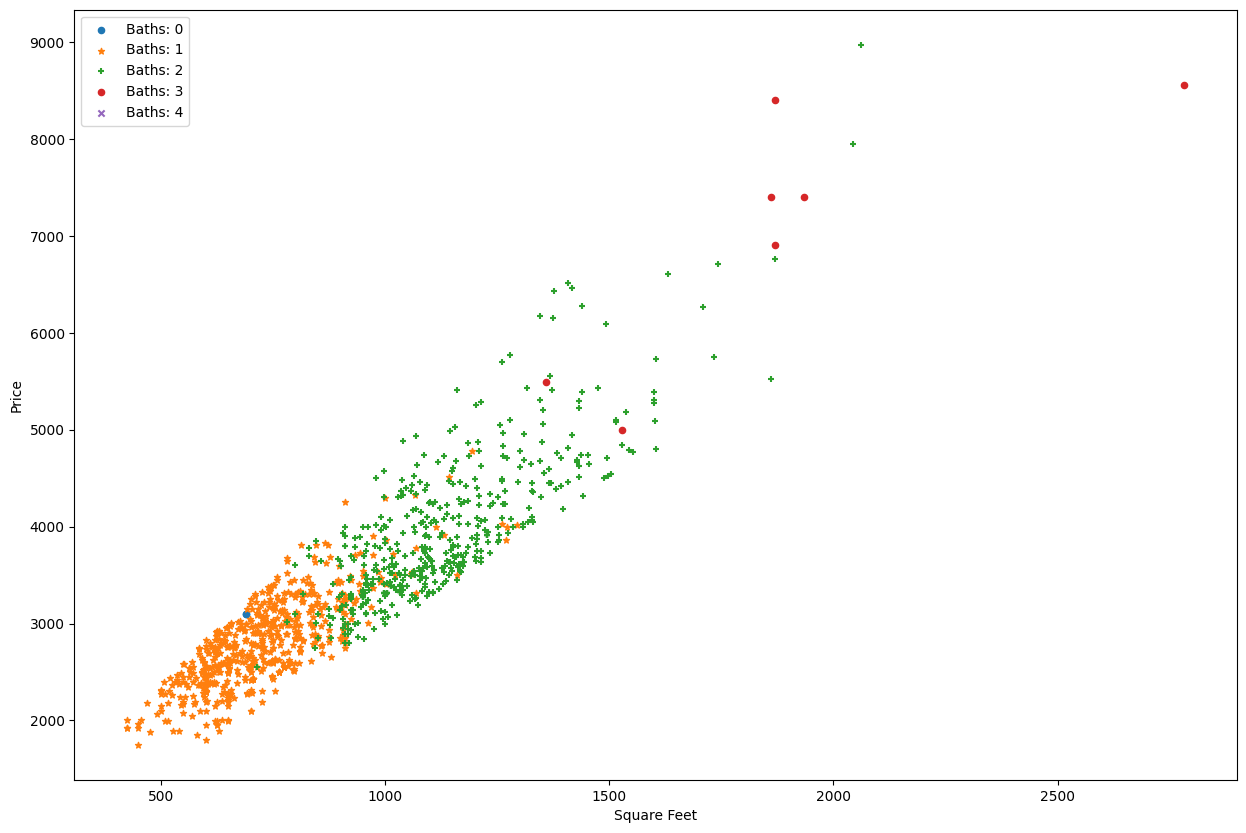

In [43]:
bed_0 = df6[(df6.Baths==0)]
bed_1 = df6[(df6.Baths==1)]
bed_2 = df6[(df6.Baths==2)]
bed_3 = df6[(df6.Baths==3)]
bed_4 = df6[(df6.Baths==4)]
markersize=20
plt.rcParams['figure.figsize'] = (15, 10)
plt.scatter(bed_0.sqft,bed_0.Price,color="tab:blue", label="Baths: 0", s=markersize)
plt.scatter(bed_1.sqft,bed_1.Price,color="tab:orange", label="Baths: 1", marker="*", s=markersize)
plt.scatter(bed_2.sqft,bed_2.Price,color="tab:green", label="Baths: 2",marker="+", s=markersize)
plt.scatter(bed_3.sqft,bed_3.Price,color="tab:red", label="Baths: 3",marker="o", s=markersize)
plt.scatter(bed_4.sqft,bed_4.Price,color="tab:purple", label="Baths: 4", marker="x", s=markersize)
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.legend()
plt.plot()

In [44]:
bed_0.head()

,Area,sqft,Beds,Baths,Price,price_per_sqft
854,East Village,689.0,0,0.0,3100,4.499274
857,East Village,689.0,0,0.0,3100,4.499274


In [45]:
df7 = df6.drop(df6[(df6.Baths==0)].index)
df7[(df4.Baths==0)]

<ipython-input-45-eb3b554771c1>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df7[(df4.Baths==0)]


,Area,sqft,Beds,Baths,Price,price_per_sqft


Text(0, 0.5, 'Count')

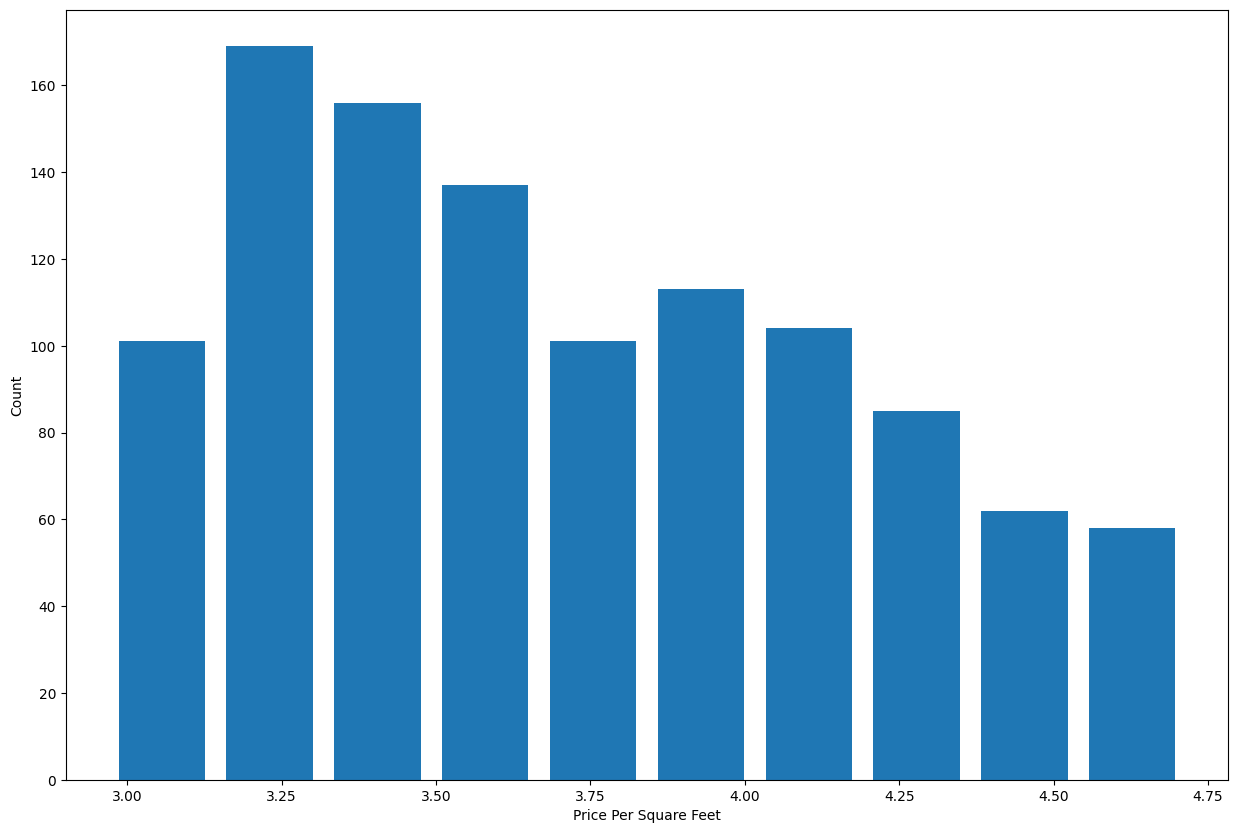

In [46]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.hist(df7.price_per_sqft, rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [47]:
# Find # bath > # bed + 2
df7[df7.Baths > df7.Beds+2]

,Area,sqft,Beds,Baths,Price,price_per_sqft


In [48]:
# drop price_per_sqft column
df8 = df7.drop(["price_per_sqft"], axis="columns")
df8.head()

,Area,sqft,Beds,Baths,Price
0,Serra Mesa,780.0,1,1.0,2890
1,Serra Mesa,1059.0,2,2.0,3295
2,Serra Mesa,1261.0,2,2.0,4495
3,Point Loma Heights,950.0,2,2.0,3995
4,East Village,572.0,0,1.0,2550


In [49]:
# Encode Text column (Area)
dummies = pd.get_dummies(df8["Area"])
dummies.head()

,Bankers Hill,Bay Park,Carmel Valley,Core-Columbia,East Village,Golden Hill,Grantville,Harborview,Hillcrest,Kearny Mesa,...,Ocean Crest,Otay Mesa,Other,Pacific Beach,Point Loma Heights,Rancho Penasquitos,Scripps Ranch,Serra Mesa,University City,University Heights
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df9 = pd.concat([df8, dummies.drop("Other", axis="columns")], axis="columns")
df9.head()

,Area,sqft,Beds,Baths,Price,Bankers Hill,Bay Park,Carmel Valley,Core-Columbia,East Village,...,North Park,Ocean Crest,Otay Mesa,Pacific Beach,Point Loma Heights,Rancho Penasquitos,Scripps Ranch,Serra Mesa,University City,University Heights
0,Serra Mesa,780.0,1,1.0,2890,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Serra Mesa,1059.0,2,2.0,3295,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Serra Mesa,1261.0,2,2.0,4495,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Point Loma Heights,950.0,2,2.0,3995,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,East Village,572.0,0,1.0,2550,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df10 = df9.drop("Area", axis="columns")
df10.head(3)

,sqft,Beds,Baths,Price,Bankers Hill,Bay Park,Carmel Valley,Core-Columbia,East Village,Golden Hill,...,North Park,Ocean Crest,Otay Mesa,Pacific Beach,Point Loma Heights,Rancho Penasquitos,Scripps Ranch,Serra Mesa,University City,University Heights
0,780.0,1,1.0,2890,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1059.0,2,2.0,3295,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1261.0,2,2.0,4495,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [52]:
df10.shape

(1086, 32)

In [53]:
X = df10.drop('Price', axis="columns")
X.head(3)

,sqft,Beds,Baths,Bankers Hill,Bay Park,Carmel Valley,Core-Columbia,East Village,Golden Hill,Grantville,...,North Park,Ocean Crest,Otay Mesa,Pacific Beach,Point Loma Heights,Rancho Penasquitos,Scripps Ranch,Serra Mesa,University City,University Heights
0,780.0,1,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1059.0,2,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1261.0,2,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [54]:
Y= df10["Price"]
Y.head(3)

0    2890
1    3295
2    4495
Name: Price, dtype: int64

# **Model Selection**

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

**GridSearchCV**

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,Y):
  algos = {
      "linear_regression": {
          "model": LinearRegression(),
          "params": {
              "copy_X": [True, False]
          }
      },
      "lasso": {
          "model": Lasso(),
          "params":{
              "alpha": [0.01, 0.1, 1, 2],
              "selection": ["random", "cyclic"]
          }
      },
      "decision_tree": {
          "model": DecisionTreeRegressor(),
          "params": {
              "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
              "splitter": ["best","random"]
          }
      }
  }

  scores = []
  cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  for algo_name, config in algos.items():
    gs = GridSearchCV(config["model"], config["params"], cv=cv, return_train_score=False)
    gs.fit(X,Y)
    scores.append({
        "model": algo_name,
        "best_score": gs.best_score_,
        "best_params": gs.best_params_
    })

  return pd.DataFrame(scores, columns=["model", "best_score", "best_params"])

find_best_model_using_gridsearchcv(X,Y)


,model,best_score,best_params
0,linear_regression,0.836783,{'copy_X': True}
1,lasso,0.837585,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.772737,"{'criterion': 'absolute_error', 'splitter': 'b..."


In [58]:
#Tran Best Model
la_clf = Lasso(alpha=1, selection="cyclic")
la_clf.fit(X_train,Y_train)
la_clf.score(X_test,Y_test)

0.8347222776938091

In [59]:
def predict_price(area,sqft,beds,baths):
  area_index = np.where(X.columns==area)[0][0]

  x= np.zeros(len(X.columns))
  x[0] = sqft
  x[1] = beds
  x[2] = baths
  if area_index >=0:
    x[area_index] = 1

  return la_clf.predict([x])[0]

In [60]:
predict_price("Bankers Hill", 1098,2,2)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


3810.5589435342986

In [61]:
# Export model
import pickle
with open("san_diego_home_prices_model.pickle", "wb") as f:
  pickle.dump(la_clf,f)

In [62]:
import json
columns={
    "data_columns" : [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
  f.write(json.dumps(columns))